In [1]:
import pandas as pd

weather = pd.read_csv("weather.csv", index_col = "DATE")

In [2]:
weather

,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,
1973-01-04,PKM00041571,"CHAKLALA, PK",NaN,NaN,49,57.0,43.0
1973-01-05,PKM00041571,"CHAKLALA, PK",NaN,NaN,53,NaN,46.0
1973-01-07,PKM00041571,"CHAKLALA, PK",NaN,NaN,53,NaN,39.0
1973-01-08,PKM00041571,"CHAKLALA, PK",NaN,NaN,52,66.0,43.0
1973-01-10,PKM00041571,"CHAKLALA, PK",NaN,NaN,52,64.0,43.0
...,...,...,...,...,...,...,...
2024-08-14,PKM00041571,"CHAKLALA, PK",NaN,NaN,89,97.0,NaN
2024-08-15,PKM00041571,"CHAKLALA, PK",0.00,NaN,80,NaN,NaN
2024-08-16,PKM00041571,"CHAKLALA, PK",0.04,NaN,84,93.0,76.0


In [3]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

STATION    0.000000
NAME       0.000000
PRCP       0.495099
SNWD       0.999936
TAVG       0.000000
TMAX       0.427116
TMIN       0.591916
dtype: float64

In [4]:
valid_columns = weather.columns[null_pct < .05]

In [5]:
valid_columns

Index(['STATION', 'NAME', 'TAVG'], dtype='object')

In [6]:
weather = weather[valid_columns].copy()

In [7]:
weather.columns = weather.columns.str.lower()

In [8]:
weather

,station,name,tavg
DATE,,,
1973-01-04,PKM00041571,"CHAKLALA, PK",49
1973-01-05,PKM00041571,"CHAKLALA, PK",53
1973-01-07,PKM00041571,"CHAKLALA, PK",53
1973-01-08,PKM00041571,"CHAKLALA, PK",52
1973-01-10,PKM00041571,"CHAKLALA, PK",52
...,...,...,...
2024-08-14,PKM00041571,"CHAKLALA, PK",89
2024-08-15,PKM00041571,"CHAKLALA, PK",80
2024-08-16,PKM00041571,"CHAKLALA, PK",84


In [9]:
weather = weather.ffill()


In [10]:
weather.apply(pd.isnull).sum()

station    0
name       0
tavg       0
dtype: int64

In [11]:
weather.apply(lambda x: (x == 9999).sum())

station    0
name       0
tavg       0
dtype: int64

In [12]:
weather.dtypes

station    object
name       object
tavg        int64
dtype: object

In [13]:
weather.index

Index(['1973-01-04', '1973-01-05', '1973-01-07', '1973-01-08', '1973-01-10',
       '1973-01-11', '1973-01-13', '1973-01-15', '1973-01-17', '1973-01-21',
       ...
       '2024-08-08', '2024-08-09', '2024-08-10', '2024-08-11', '2024-08-13',
       '2024-08-14', '2024-08-15', '2024-08-16', '2024-08-17', '2024-08-18'],
      dtype='object', name='DATE', length=15710)

In [14]:
weather.index = pd.to_datetime(weather.index)

In [15]:
weather.index.year.value_counts().sort_index()

DATE
1973     50
1974     11
1975    135
1976    143
1977    139
1978    202
1979    287
1980    315
1981    288
1982    213
1983    257
1984    257
1985    314
1986    313
1987    237
1988    243
1989    294
1990    258
1991    247
1992    347
1993    360
1994    365
1995    365
1996    364
1997    360
1998    358
1999    346
2000    298
2001    363
2002    352
2003    365
2004    366
2005    365
2006    364
2007    365
2008    366
2009    364
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    364
2018    364
2019    172
2020    346
2021    343
2022    343
2023    363
2024    222
Name: count, dtype: int64

<Axes: xlabel='DATE'>

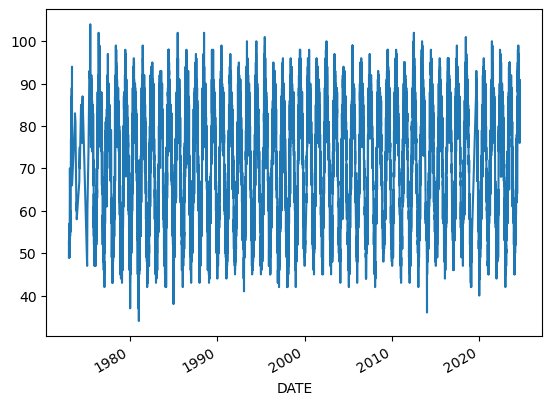

In [16]:
weather["tavg"].plot()

In [18]:
weather["target"] = weather.shift(-1)["tavg"]

In [19]:
weather

,station,name,tavg,target
DATE,,,,
1973-01-04,PKM00041571,"CHAKLALA, PK",49,53.0
1973-01-05,PKM00041571,"CHAKLALA, PK",53,53.0
1973-01-07,PKM00041571,"CHAKLALA, PK",53,52.0
1973-01-08,PKM00041571,"CHAKLALA, PK",52,52.0
1973-01-10,PKM00041571,"CHAKLALA, PK",52,50.0
...,...,...,...,...
2024-08-14,PKM00041571,"CHAKLALA, PK",89,80.0
2024-08-15,PKM00041571,"CHAKLALA, PK",80,84.0
2024-08-16,PKM00041571,"CHAKLALA, PK",84,81.0


In [20]:
weather = weather.ffill()

In [21]:
weather

,station,name,tavg,target
DATE,,,,
1973-01-04,PKM00041571,"CHAKLALA, PK",49,53.0
1973-01-05,PKM00041571,"CHAKLALA, PK",53,53.0
1973-01-07,PKM00041571,"CHAKLALA, PK",53,52.0
1973-01-08,PKM00041571,"CHAKLALA, PK",52,52.0
1973-01-10,PKM00041571,"CHAKLALA, PK",52,50.0
...,...,...,...,...
2024-08-14,PKM00041571,"CHAKLALA, PK",89,80.0
2024-08-15,PKM00041571,"CHAKLALA, PK",80,84.0
2024-08-16,PKM00041571,"CHAKLALA, PK",84,81.0


In [22]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)

In [23]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [24]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["target"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [25]:
predictions = backtest(weather, rr, predictors)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

2.7072575937195116

In [27]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2019-02-25,90.0,54.694325,35.305675
2018-04-19,59.0,75.798819,16.798819
2001-03-27,61.0,77.603930,16.603930
2015-04-26,65.0,81.540726,16.540726
1991-06-07,76.0,92.481175,16.481175
...,...,...,...
2008-02-12,50.0,49.998688,0.001312
2008-01-06,50.0,49.998688,0.001312
2009-08-03,92.0,92.001068,0.001068


In [28]:
pd.Series(rr.coef_, index=predictors)

tavg    0.959939
dtype: float64

In [30]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather
    
rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["tavg"]:
        weather = compute_rolling(weather, horizon, col)

In [32]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tavg"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [33]:
weather = weather.iloc[14:,:]
weather = weather.fillna(0)

In [34]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [35]:
predictions = backtest(weather, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

2.5771939411207643

In [36]:
mean_squared_error(predictions["actual"], predictions["prediction"])

11.122637415628027

In [37]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2019-02-25,90.0,55.351460,34.648540
2018-04-19,59.0,75.520937,16.520937
2014-05-11,63.0,78.486120,15.486120
2015-04-26,65.0,80.279820,15.279820
1991-06-07,76.0,90.907896,14.907896
...,...,...,...
2013-12-31,46.0,46.002075,0.002075
2021-12-06,56.0,56.002071,0.002071
2003-11-21,56.0,55.997929,0.002071


In [41]:
weather

,station,name,tavg,target,rolling_3_tavg,rolling_3_tavg_pct,rolling_14_tavg,rolling_14_tavg_pct,month_avg_tavg,day_avg_tavg
DATE,,,,,,,,,,
1973-02-05,PKM00041571,"CHAKLALA, PK",51,63.0,51.333333,-0.006494,51.857143,-0.016529,51.333333,51.000000
1973-02-12,PKM00041571,"CHAKLALA, PK",63,65.0,56.000000,0.125000,52.571429,0.198370,54.250000,63.000000
1973-02-14,PKM00041571,"CHAKLALA, PK",65,70.0,59.666667,0.089385,53.428571,0.216578,56.400000,65.000000
1973-02-15,PKM00041571,"CHAKLALA, PK",70,63.0,66.000000,0.060606,54.714286,0.279373,58.666667,70.000000
1973-02-22,PKM00041571,"CHAKLALA, PK",63,54.0,66.000000,-0.045455,55.500000,0.135135,59.285714,63.000000
...,...,...,...,...,...,...,...,...,...,...
2024-08-14,PKM00041571,"CHAKLALA, PK",89,80.0,83.666667,0.063745,84.571429,0.052365,83.836167,83.525000
2024-08-15,PKM00041571,"CHAKLALA, PK",80,84.0,85.000000,-0.058824,83.785714,-0.045183,83.833205,83.809524
2024-08-16,PKM00041571,"CHAKLALA, PK",84,81.0,84.333333,-0.003953,84.000000,0.000000,83.833333,84.404762


<Axes: xlabel='diff'>

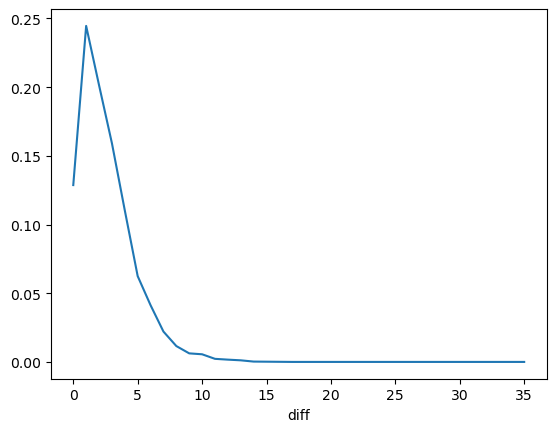

In [39]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()

In [40]:
predictions

,actual,prediction,diff
DATE,,,
1989-11-22,59.0,58.684532,0.315468
1989-11-23,63.0,59.522615,3.477385
1989-11-24,56.0,60.745081,4.745081
1989-11-25,59.0,58.564430,0.435570
1989-11-27,56.0,59.738388,3.738388
...,...,...,...
2024-08-14,80.0,86.821949,6.821949
2024-08-15,84.0,81.882917,2.117083
2024-08-16,81.0,84.185719,3.185719
